In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
!pip install datasets

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.datasets import load_files
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datasets import load_dataset
import os, os.path
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import numpy as np
import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [56]:
train_data_dir = '/content/drive/MyDrive/Thoa/DataAugmentedOrigin/train'
test_data_dir = '/content/drive/MyDrive/Thoa/DataAugmentedOrigin/test'
val_data_dir = '/content/drive/MyDrive/Thoa/DataAugmentedOrigin/val'

labels = ['Cam thao', 'Cay bac ha', 'Cay luu ly', 'Cay mac co', 'Cay ma de', 'Co thom', 'Dinh huong', 'Dong trung ha thao', 'Hat de ngua', 'Hoa dau biec', 'Ich mau', 'Ngai cuu', 'Nha dam', 'Toi', 'Trinh nu hoang cung', 'Y di']

In [57]:
def load_image(data_dir):
    dataset = load_dataset("imagefolder", data_dir = data_dir)
    images = dataset['train']['image']
    labels = dataset['train']['label']
    return images, labels

In [58]:
X_train, y_train = load_image(train_data_dir)
X_test, y_test = load_image(test_data_dir)
X_val, y_val = load_image(val_data_dir)

Resolving data files:   0%|          | 0/3924 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/208 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/208 [00:00<?, ?it/s]

In [59]:
def one_hot_coding(y):
    # Create a one-hot encoder
    encoder = OneHotEncoder()

    # Fit and transform the data
    one_hot_data = encoder.fit_transform(np.array(y).reshape(-1, 1)).toarray()

    return one_hot_data

def decode_one_hot(one_hot_data, labels):
     # Get the index of the non-zero element in each row
    decoded_data_to_int = np.argmax(one_hot_data, axis=1)

    # Assign the corresponding unique values
    decoded_data_to_origin = [labels[i] for i in decoded_data_to_int]

    return decoded_data_to_int, np.array(decoded_data_to_origin)

In [60]:
y_train = one_hot_coding(y_train)
y_test = one_hot_coding(y_test)
y_val = one_hot_coding(y_val)

In [61]:
def convert_image_to_array_form(X):
    image_array = []
    for image in X:
        image = np.array(image)
        new_size = (224, 224)
        img_resized = cv2.resize(image, new_size)
        image_array.append(img_resized)
    return np.array(image_array)

In [62]:
X_train = convert_image_to_array_form(X_train)
X_test = convert_image_to_array_form(X_test)
X_val = convert_image_to_array_form(X_val)

In [63]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),


    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(256, activation='relu'),  # Giảm kích thước lớp Dense
    keras.layers.Dropout(0.5),

    keras.layers.Dense(128, activation='relu'),  # Giảm kích thước lớp Dense
    keras.layers.Dropout(0.5),

    keras.layers.Dense(16, activation='softmax')
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Recall']
)

In [64]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_20 (Ba  (None, 224, 224, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_21 (Ba  (None, 112, 112, 64)     

In [65]:
history = model.fit(X_train,y_train, batch_size = 32, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
123/123 [==============================] - 27s 137ms/step - loss: 4.2006 - accuracy: 0.0686 - recall: 0.0102 - val_loss: 2.7958 - val_accuracy: 0.0938 - val_recall: 0.0000e+00
Epoch 2/50
123/123 [==============================] - 16s 133ms/step - loss: 2.7891 - accuracy: 0.0827 - recall: 7.6766e-04 - val_loss: 2.7933 - val_accuracy: 0.0781 - val_recall: 0.0000e+00
Epoch 3/50
123/123 [==============================] - 16s 134ms/step - loss: 2.7687 - accuracy: 0.0786 - recall: 2.5589e-04 - val_loss: 2.6998 - val_accuracy: 0.1042 - val_recall: 0.0000e+00
Epoch 4/50
123/123 [==============================] - 17s 134ms/step - loss: 2.7586 - accuracy: 0.0847 - recall: 0.0020 - val_loss: 2.7904 - val_accuracy: 0.0677 - val_recall: 0.0052
Epoch 5/50
123/123 [==============================] - 17s 135ms/step - loss: 2.7228 - accuracy: 0.1039 - recall: 0.0069 - val_loss: 2.6394 - val_accuracy: 0.1354 - val_recall: 0.0000e+00
Epoch 6/50
123/123 [==============================] - 16s 133

In [66]:
model_path = '/content/drive/MyDrive/Thoa/v3.h5'
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


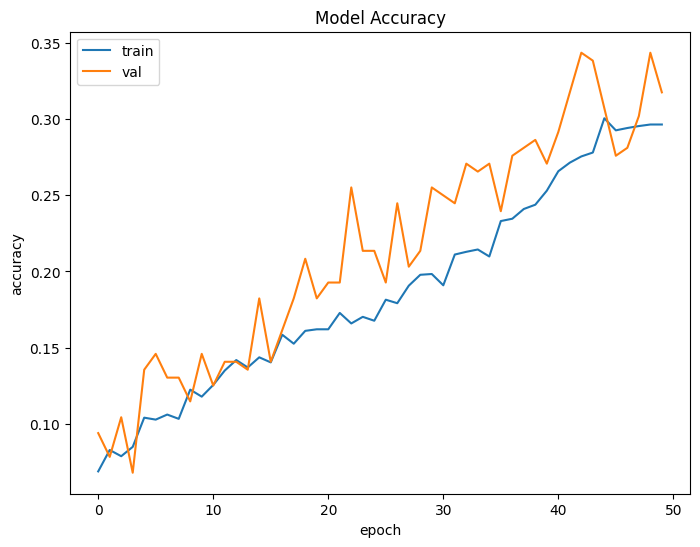

In [67]:
import matplotlib.pyplot as plt
#plotting the Accuracy of test and training sets
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("/content/drive/MyDrive/Thoa/v3_acc.png", dpi=300)
plt.show()

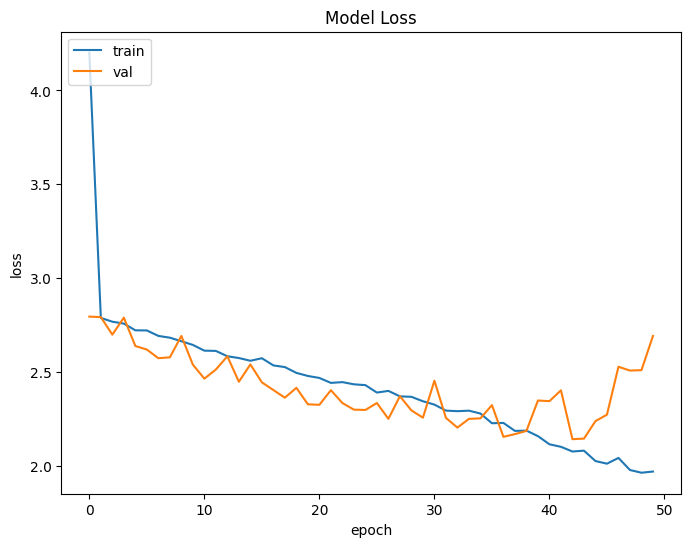

In [68]:
#plotting the loss of test and training sets
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig("/content/drive/MyDrive/Thoa/v3_loss.png", dpi=300)
plt.show()

In [69]:
acc_score = model.evaluate(X_train, y_train) #we are starting to test the model here
print('\n', 'Train accuracy:', acc_score[1])

acc_score = model.evaluate(X_val, y_val) #we are starting to test the model here
print('\n', 'Val accuracy:', acc_score[1])

acc_score = model.evaluate(X_test, y_test) #we are starting to test the model here
print('\n', 'Test accuracy:', acc_score[1])

123/123 [==============================] - 3s 20ms/step - loss: 2.7802 - accuracy: 0.3493 - recall: 0.2183

 Train accuracy: 0.34928351640701294
6/6 [==============================] - 0s 21ms/step - loss: 2.6929 - accuracy: 0.3177 - recall: 0.1979

 Val accuracy: 0.3177083432674408
6/6 [==============================] - 0s 21ms/step - loss: 2.8646 - accuracy: 0.2969 - recall: 0.1771

 Test accuracy: 0.296875


6/6 [==============================] - 0s 16ms/step


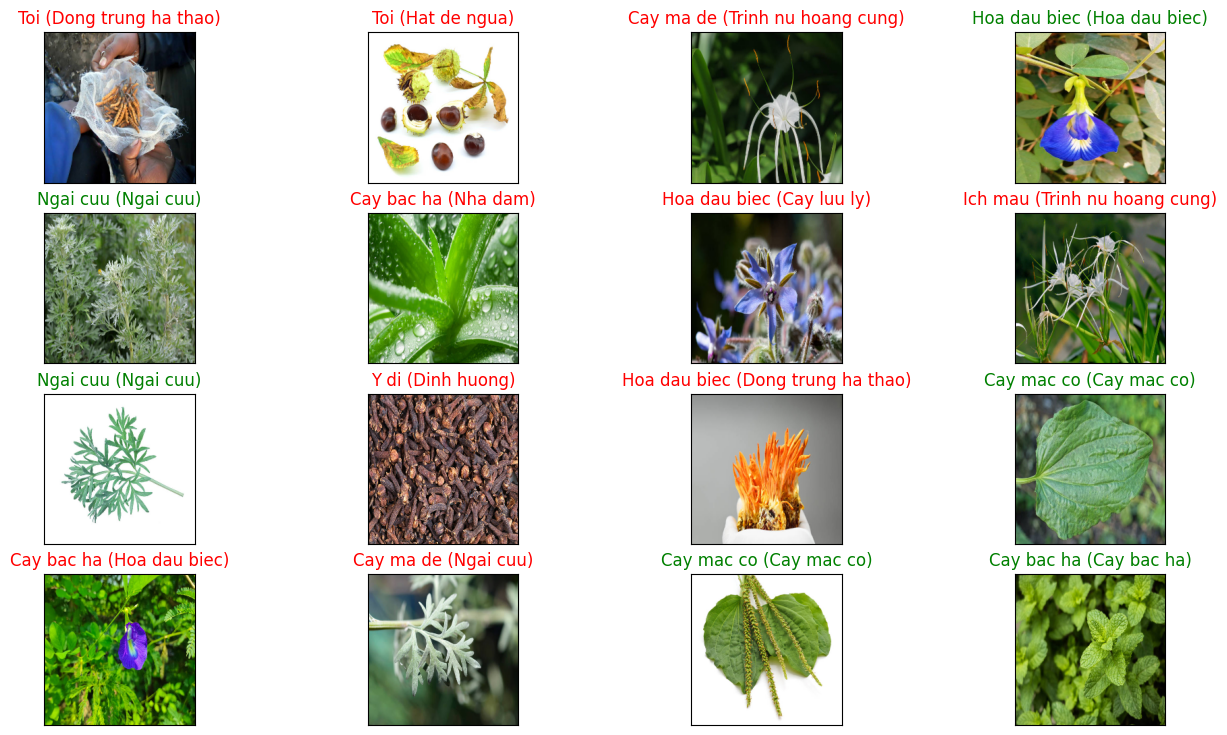

In [70]:
predictions = model.predict(X_test)
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(predictions[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))